#### 𝗟𝗲𝘃𝗲𝗹 - 𝟮 𝗧𝗮𝘀𝗸 -  𝟮 

Tᴀsᴋ: 𝗖𝘂𝗶𝘀𝗶𝗻𝗲 𝗖𝗼𝗺𝗯𝗶𝗻𝗮𝘁𝗶𝗼𝗻

• Identify the most common combinations of cuisines in the dataset.

• Determine if certain cuisine combinations tend to have higher ratings.

## Loading dataset:

In [1]:
# Import all necessary libraries:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the dataset:

df = pd.read_csv(r"E:\Cognifyz_Internship\Dataset.csv")
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [3]:
# Check the columns name and its datatype:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

## Identify the most common combinations of cuisines in the dataset.

In [4]:
# Remove rows which have missing values in the 'Cuisines' column:

df.dropna(subset='Cuisines', inplace=True)

In [5]:
# Identify most common combinations of cuisines:

cuisine_combinations = df['Cuisines'].str.split(', ').apply(sorted).apply(', '.join)
most_common_cuisines_combinations = cuisine_combinations.value_counts().head(5)
most_common_cuisines_combinations

Cuisines
North Indian             936
Chinese, North Indian    616
Mughlai, North Indian    394
Fast Food                354
Chinese                  354
Name: count, dtype: int64

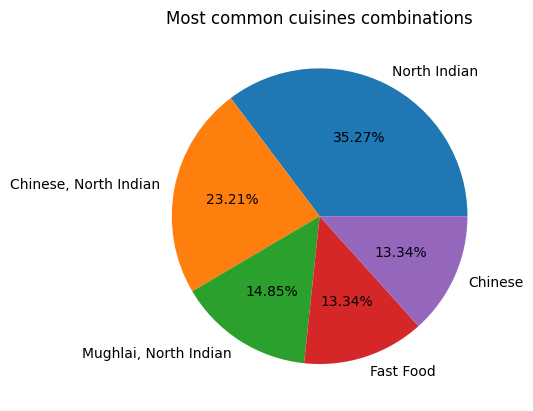

In [6]:
plt.pie(most_common_cuisines_combinations, labels = most_common_cuisines_combinations.index,  autopct='%.2f%%')
plt.title('Most common cuisines combinations')
plt.show()

## Determine if certain cuisine combinations tend to have higher ratings.

In [7]:
avg_ratings_by_combination = df.groupby(cuisine_combinations).agg({'Aggregate rating' : 'mean'})
print('Average ratings by cuisine combination')
print(avg_ratings_by_combination)

Average ratings by cuisine combination
                                           Aggregate rating
Cuisines                                                   
Afghani                                               0.725
Afghani, Arabian, North Indian, Pakistani             0.000
Afghani, Chinese, Indian, Pakistani                   4.100
Afghani, Chinese, Mughlai                             0.000
Afghani, Curry, Indian, Pakistani                     3.900
...                                                     ...
Tibetan                                               0.000
Turkish                                               3.400
Turkish Pizza                                         4.300
Vietnamese                                            4.050
World Cuisine                                         4.900

[1343 rows x 1 columns]


In [8]:
# Further analyze the relationship between cuisine combinations and rating:

overall_avg_rating = df['Aggregate rating'].mean()
overall_avg_rating = round(overall_avg_rating,2)
print('Overall average rating:', overall_avg_rating)

Overall average rating: 2.67


In [9]:
average_ratings_by_combination = df.groupby(cuisine_combinations)['Aggregate rating'].mean()
print("\nAverage Ratings by Cuisine Combination:")
print(average_ratings_by_combination)

print("{:<65}{:<25}{:<30}".format("Cuisine combination", "Average rating", "Difference from overall average"))
for combination, avg_rating in average_ratings_by_combination.items():
    print(f"{combination:<65}{avg_rating:<25.2f}{avg_rating - overall_avg_rating:<30.2f}")



Average Ratings by Cuisine Combination:
Cuisines
Afghani                                      0.725
Afghani, Arabian, North Indian, Pakistani    0.000
Afghani, Chinese, Indian, Pakistani          4.100
Afghani, Chinese, Mughlai                    0.000
Afghani, Curry, Indian, Pakistani            3.900
                                             ...  
Tibetan                                      0.000
Turkish                                      3.400
Turkish Pizza                                4.300
Vietnamese                                   4.050
World Cuisine                                4.900
Name: Aggregate rating, Length: 1343, dtype: float64
Cuisine combination                                              Average rating           Difference from overall average
Afghani                                                          0.72                     -1.94                         
Afghani, Arabian, North Indian, Pakistani                        0.00                     -2.